In [3]:
import numpy as np
from numba import cuda, jit
from datetime import datetime
import matplotlib.pyplot as plt
from numba.cuda.random import xoroshiro128p_uniform_float32, create_xoroshiro128p_states

In [4]:
def cpu_PI(N):
  res = 0
  count = 0
  for i in range(N):
    x = np.random.uniform()
    y = np.random.uniform()
    if x**2 + y**2 <= 1:
      count+=1
    res = 4 * count / N
  return res

In [5]:
def DeviceHost(N):
  TPB = 16
  rng = create_xoroshiro128p_states(N, seed=1)
  res = [0]
  d_res = cuda.to_device(res)
  gpu_PI[N, TPB](d_res, rng)
  return (d_res.copy_to_host()/N*4)

In [6]:
@cuda.jit
def gpu_PI(res, rng):
  i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
  count = 0
  if i < len(rng):
    x = xoroshiro128p_uniform_float32(rng, i)
    y = xoroshiro128p_uniform_float32(rng, i)
    if x ** 2 + y ** 2 <= 1.0:
      count+=1
  cuda.atomic.add(res, 0, count)

In [11]:
def main ():
  cpu_ress = []
  cpu_times = []
  gpu_ress = []
  gpu_times = []
  for i in range(1000, 1000000, 1000):
    print("Начался цикл с", i, "количеством элементов")
    start0 = datetime.now()
    cpu_ress.append(cpu_PI(i))
    cpu_times.append(datetime.now()-start0)
    print("Результат процессора в данном цикле", cpu_ress[-1])
    print("Время вычисления процессора", cpu_times[-1])
    start1 = datetime.now()
    gpu_ress.append(DeviceHost(i))
    gpu_times.append(datetime.now()-start1)
    print("Результат видеокарты в данном цикле", gpu_ress[-1])
    print("Время вычисления видеокарты", gpu_times[-1])
    print()
  return(cpu_ress, cpu_times, gpu_ress, gpu_times)

In [12]:
cpu_res, cpu_time, gpu_res, gpu_time = main()

Выходные данные были обрезаны до нескольких последних строк (5000).
Время вычисления видеокарты 0:00:00.051026

Начался цикл с 166000 количеством элементов
Результат процессора в данном цикле 3.142530120481928
Время вычисления процессора 0:00:00.895927
Результат видеокарты в данном цикле [3.14106024]
Время вычисления видеокарты 0:00:00.050231

Начался цикл с 167000 количеством элементов
Результат процессора в данном цикле 3.144431137724551
Время вычисления процессора 0:00:00.930773
Результат видеокарты в данном цикле [3.14153293]
Время вычисления видеокарты 0:00:00.049362

Начался цикл с 168000 количеством элементов
Результат процессора в данном цикле 3.140047619047619
Время вычисления процессора 0:00:00.927538
Результат видеокарты в данном цикле [3.14197619]
Время вычисления видеокарты 0:00:00.051930

Начался цикл с 169000 количеством элементов
Результат процессора в данном цикле 3.139526627218935
Время вычисления процессора 0:00:00.932266
Результат видеокарты в данном цикле [3.142059

In [25]:
gpu_times = [] # Забыл перевести datetime в float
cpu_times = []
for element in gpu_time:
  gpu_times.append(element.total_seconds())
for element in cpu_time:
  cpu_times.append(element.total_seconds())


In [16]:
elements = []
for i in range(1000, 1000000, 1000):
  elements.append(i)
cpu_dev = []
gpu_dev = []
for i in range (len(gpu_res)):
  cpu_dev.append(cpu_res[i]-3.1415926535)
  gpu_dev.append(gpu_res[i]-3.1415926535)

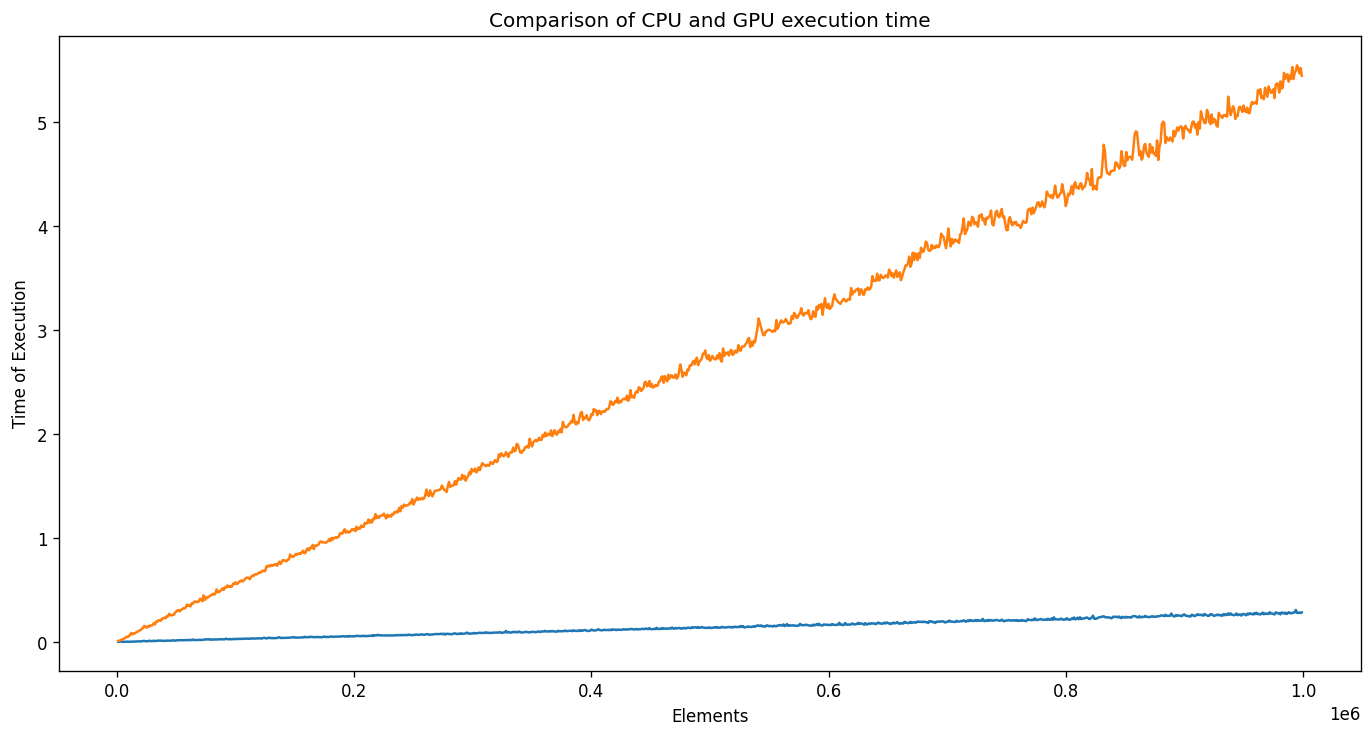

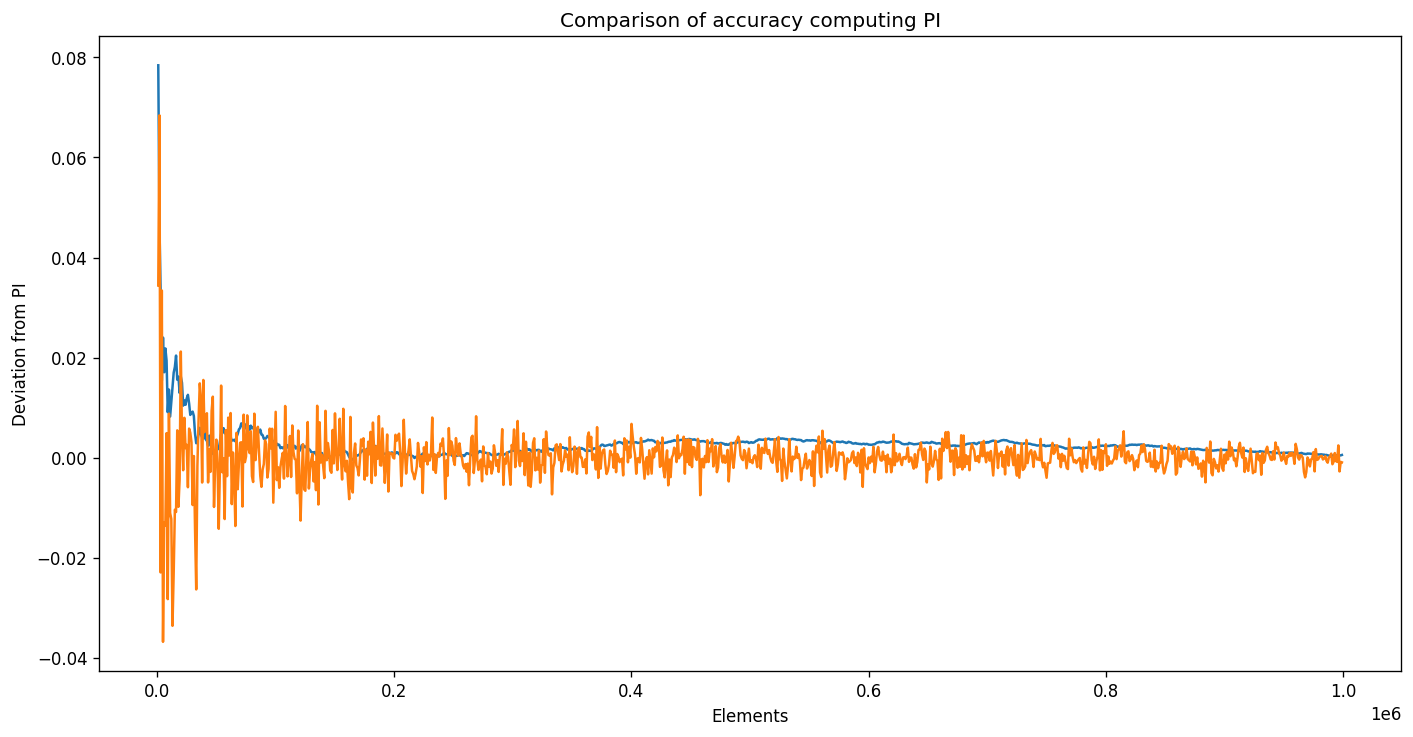

In [26]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=120)

plt.xlabel("Elements")
plt.ylabel("Time of Execution")
plt.title("Comparison of CPU and GPU execution time")
ax1.plot(elements, gpu_times)
ax1.plot(elements,cpu_times)

fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=120)

plt.xlabel("Elements")
plt.ylabel("Deviation from PI")
plt.title("Comparison of accuracy computing PI")
ax2.plot(elements, gpu_dev)
ax2.plot(elements,cpu_dev)